In [2]:
# Deps
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Exercise 1

(a) $I = \int^2_1 \frac{exp(-x^2 /2)}{\sqrt{2 \pi}} dx =  E_{U(1, 2)} \left[ \frac{exp(-x^2 /2)}{\sqrt{2 \pi}} \right] \approx 0.135940$

$\hat{se} = \frac{s}{\sqrt{N}} = \sqrt{ \frac{\sum^N_{i = 1} (w(X_i) - \hat{I})}{N(N-1)} }$

In [7]:
N = 100000
# h(x) = w(x) f(x), where f(x) = 1/ (2 - 1) = 1 uniform on [1, 2]
def gauss(x, mu, v):
    return np.exp(- np.square(x - mu) / (2* v* v)) / ( v * np.sqrt(2 * np.pi))

def w(x, mu=0, v=1):
    y = gauss(x, mu, v)
    return y

def se(y, t, N):
    return np.sqrt(np.sum(np.square(y - t)) / (N * (N - 1)))

x = np.random.uniform(1, 2, N)
y = w(x)
est_int = np.sum(y) / N
est_err = se(y, est_int, N)
print("Approximated I is %f" % est_int)
print("Estimated standard error is %f" % est_err)

Approximated I is 0.135628
Estimated standard error is 0.000174


(b) 
$ I = \int^2_1 \frac{exp(-x^2 /2)}{\sqrt{2 \pi}} dx = \int^2_{0} \frac{exp(-x^2 /2)}{\sqrt{2 \pi}} dx - \int^1_{0} \frac{exp(-x^2 /2)}{\sqrt{2 \pi}} dx = \frac{1}{2} \left[ erf(2/\sqrt{2}) - erf(1/\sqrt{2}) \right] = 0.135905...$

(c) $I = \int^2_1 \frac{exp(-x^2 /2)}{\sqrt{2 \pi}} dx = \int^2_1 N(x \mid 0, 1) dx = \int^2_1 \frac{N(x \mid 0,1)}{N(x \mid 1.5, v^2)} N(x \mid 1.5, v^2) dx = E_{N(x \mid 1.5, v^2)} \left[ \frac{\exp(-0.5 x^2) / \sqrt{2\pi}}{ \exp(-(x - 1.5)^2 / (2 v^2)) / \sqrt{2\pi v^2}}\right] = E[w]$ Note that we have to extend $w$ to all of real number, $w = 0$ if $x \notin [1,2]$

For v = 0.100000, est_int is 0.137725,  est_err is 0.026201


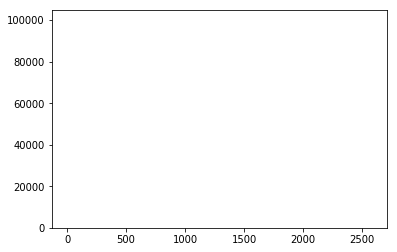

For v = 1.000000, est_int is 0.135750,  est_err is 0.000518


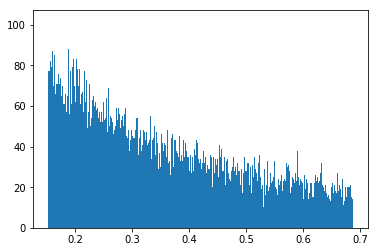

For v = 10.000000, est_int is 0.136343,  est_err is 0.002243


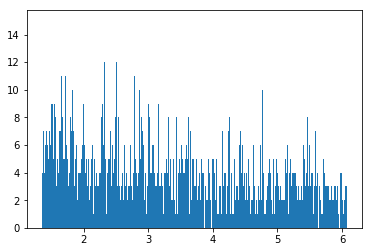

In [9]:
def g(v, N):
    x = np.random.normal(1.5, v, size = N)
    return x[(1 <= x) & (x <= 2)]

def w_is(x, v):
    y = gauss(x, 0, 1) / gauss(x, 1.5, v)
    # we need to extend the function by setting it to 0 outside of [1,2]
    y[(x < 1) | (x > 2)] = 0
    return y

for v in [0.1, 1.0, 10.0]:
    x = g(v, N)
    y = w_is(x, v)
    est_int = np.sum(y) / N
    est_err = se(y, est_int, N)
    print("For v = %f, est_int is %f,  est_err is %f" % (v, est_int, est_err))
    plt.hist(y, bins=1000)
    plt.show()

# Normal with thinner tails has larger variance and some outliers with large values.

(d) The optimal $g^*$ is $f$ itself. Which is $N(0,1)$. 